#  Comparation DDPM and Gan Model with Cat Image Dataset

this note book will compare two Generative Model to generate the image with some constraintion.

generate image with cat image dataset

step
- load image to tensor
- build model
-- select loss function
-- select optimizer

- and the end evaluate the quality of the generated sample, use objective measures such as the inception score or Fréchet Inception Distance (FID) to quantitatively evaluate the quality of the samples.

then compare this two generative model in detail.

description
The inception score measures the quality and diversity of the generated images, while the FID measures the distance between the generated images and a set of real images. These metrics can provide a quantitative comparison of the models' performance.


Base on:
- Papers on Diffusion models ([Dhariwal, Nichol, 2021], [Ho et al., 2020] ect.)
- 

/home/nice/anaconda3/lib/python3.9/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


1706


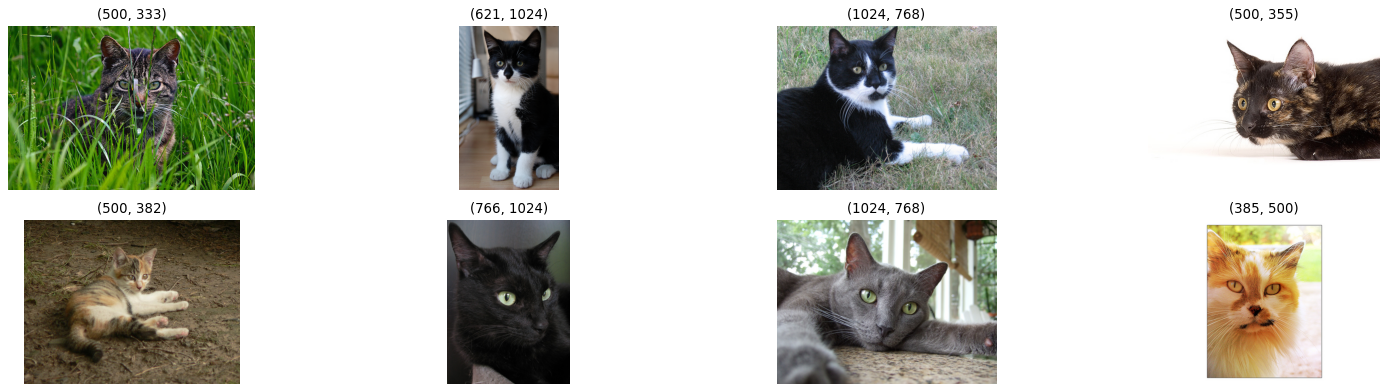

In [1]:
import os #for joint the path
import glob #for find the pattern file 
from PIL import Image #for load image file

import torch
import torchvision
from torchvision import transforms 
import matplotlib.pyplot as plt

def show_images(datset, num_samples=12, cols=4):
    plt.figure(figsize=(15,15)) 
    for i, img in enumerate(data):
        if i == num_samples:
            break
        plt.subplot(int(num_samples/cols + 1), cols, int(i + 1))
        plt.imshow(img[0])

# data = torchvision.datasets.DatasetFolder()
# show_images(data)

# load datasets and plot them
INPUT_PATH = "./archive/CAT_00"
img_path_list = glob.glob(os.path.join(INPUT_PATH,"*.jpg"))
print(len(img_path_list))

plt.figure(figsize=(20,5), dpi=80, tight_layout = True)
for i in range(8):
    plt.subplot(2,4,i+1)
    img = Image.open(img_path_list[i])
    plt.imshow(img)
    plt.axis("OFF")
    plt.title(img.size)



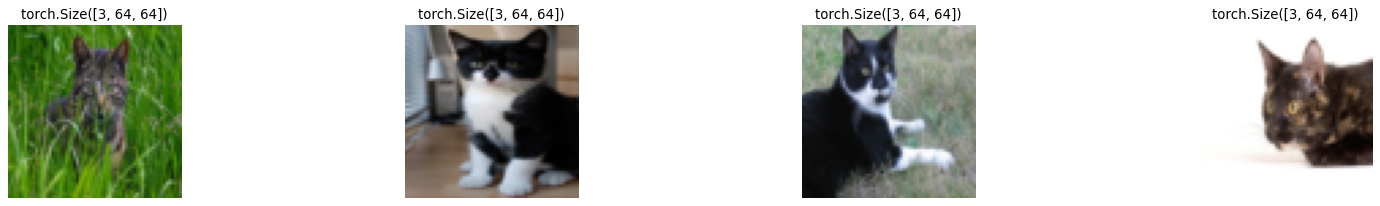

In [9]:
# convert image to tensor

# IMG_MEAN = [0.5, 0.5, 0.5]
# IMG_STD = [0.5, 0.5, 0.5]
size = (64,64)

data_transform = transforms.Compose([
    transforms.Resize(size),
    transforms.ToTensor(), #to scale image [0, 1]
    # transforms.Normalize(mean=IMG_MEAN, std=IMG_STD),
])

plt.figure(figsize=(20,5), dpi=80, tight_layout = True)
for i in range(4):
    img = Image.open(img_path_list[i])
    x = data_transform(img)
    plt.subplot(2,4,i+1)
    plt.title(x.shape)
    plt.axis("off")
    plt.imshow(x.permute(1,2,0)) #convert image order from channel-height-width to height-width-channel
plt.show()

